<a href="https://colab.research.google.com/github/gabrielalastra/PYTHON/blob/master/analysis_panda2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

lendo um dado externo e plotando 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/btc-market-price.csv')

In [ ]:
#os primeiro elementos
df.head()

,2017-04-02 00:00:00,1099.169125
0,2017-04-03 00:00:00,1141.813000
1,2017-04-04 00:00:00,1141.600363
2,2017-04-05 00:00:00,1133.079314
3,2017-04-06 00:00:00,1196.307937
4,2017-04-07 00:00:00,1190.454250


In [ ]:
#os ultimos elementos
df.tail()

,2017-04-02 00:00:00,1099.169125
359,2018-03-28 00:00:00,7960.380000
360,2018-03-29 00:00:00,7172.280000
361,2018-03-30 00:00:00,6882.531667
362,2018-03-31 00:00:00,6935.480000
363,2018-04-01 00:00:00,6794.105000


In [ ]:
#a primeira linha esta sendo lida como cabecalho
df = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/btc-market-price.csv', header=None)

In [ ]:
df.head()

,0,1
0,2017-04-02 00:00:00,1099.169125
1,2017-04-03 00:00:00,1141.813000
2,2017-04-04 00:00:00,1141.600363
3,2017-04-05 00:00:00,1133.079314
4,2017-04-06 00:00:00,1196.307937


In [ ]:
#mudar o nome do cabecalho
df.columns = ['dia', 'preco'] 

In [ ]:
#(linhas,colunas)
df.shape

(365, 2)

In [ ]:
#a coluna timestamp eh objeto ou string
#a coluno dos precos eh float number
df.dtypes

dia       object
preco    float64
dtype: object

In [ ]:
#mudar o dtype de objeto para data
pd.to_datetime(df['dia']).head()

0   2017-04-02
1   2017-04-03
2   2017-04-04
3   2017-04-05
4   2017-04-06
Name: dia, dtype: datetime64[ns]

In [ ]:
df['dia'] = pd.to_datetime(df['dia'])

In [ ]:
df.dtypes

dia      datetime64[ns]
preco           float64
dtype: object

In [ ]:
#transformando os dias em index
df.set_index('dia', inplace=True)

In [ ]:
df

In [ ]:
df.loc['2018-01-01']

preco    13812.186667
Name: 2018-01-01 00:00:00, dtype: float64

In [ ]:
#colocando tudo junto ficaria
df = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/btc-market-price.csv',
                 header=None, #nao tem cabecalho
                 names=['dia', 'preco'], #nome das colunas
                 index_col=0, #primeira coluna eh o index
                 parse_dates=True #oq eh data eh data
)

In [ ]:
#outro modo de por tudo junto
df = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/btc-market-price.csv', header=None)
df.columns = ['dia', 'preco']
df['dia'] = pd.to_datetime(df['dia'])
df.set_index('dia', inplace=True)

panda e matplot trabalham juntos

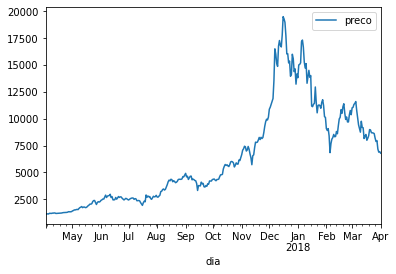

In [ ]:
df.plot()

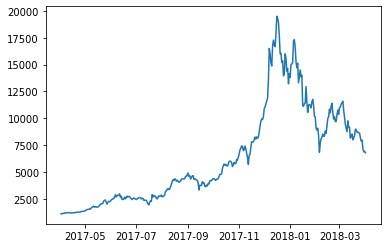

In [ ]:
plt.plot(df.index,df['preco']) 
#os primeiros dois parametros sao os valores de x e y

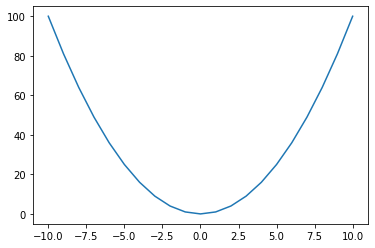

In [ ]:
#exemplo
x = np.arange(-10,11)
plt.plot(x, x**2)

Text(0.5, 1.0, 'titlo vem aqui')

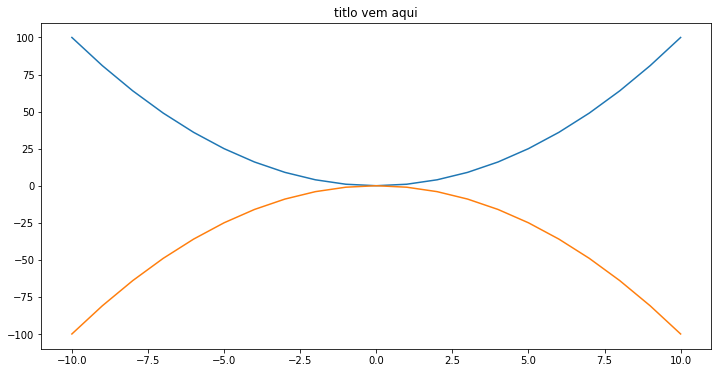

In [ ]:
#as funcoes plt alteram o estado global, se vc quer aplicar recortes
#pode usar o plt.figure, outros como plt.title alteram todo o plot.

plt.figure(figsize=(12,6))
plt.plot(x, x**2) #plot sorriso
plt.plot(x, -1*(x**2)) #plot sela
plt.title('titlo vem aqui')

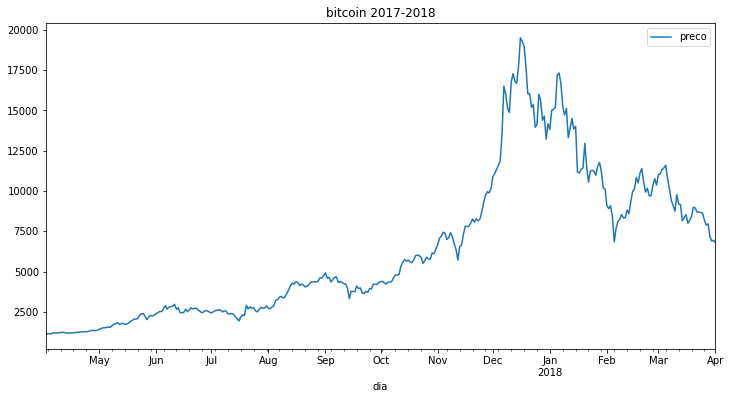

In [ ]:
df.plot(figsize=(12,6), title='bitcoin 2017-2018')

In [ ]:
#abrindo o eth para juntar no mesmo grafico
#parse_dates=[0] = primeira coluna, lembrando que o index nao conta
#index_col = coluna index == primeira que é DATE UTC
eth = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/eth-price.csv', 
                  parse_dates=[0],
                  index_col=0)
print(eth.dtypes)
print(eth.info())
eth.head()

UnixTimeStamp      int64
Value            float64
dtype: object
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 362 entries, 2017-04-02 to 2018-04-01
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   UnixTimeStamp  362 non-null    int64  
 1   Value          362 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 8.5 KB
None


,UnixTimeStamp,Value
Date(UTC),,
2017-04-02,1491091200,48.55
2017-04-03,1491177600,44.13
2017-04-04,1491264000,44.43
2017-04-05,1491350400,44.90
2017-04-06,1491436800,43.23


In [ ]:
#o parse_dates nao adiantou
pd.to_datetime(eth['UnixTimeStamp']).head()

0   1970-01-01 00:00:01.491091200
1   1970-01-01 00:00:01.491177600
2   1970-01-01 00:00:01.491264000
3   1970-01-01 00:00:01.491350400
4   1970-01-01 00:00:01.491436800
Name: UnixTimeStamp, dtype: datetime64[ns]

In [ ]:
#como tem o mesmo index bit eth, podemos juntar
preco2 = pd.DataFrame(index=df.index)

In [ ]:
preco2.head()

""
dia
2017-04-02
2017-04-03
2017-04-04
2017-04-05
2017-04-06


In [ ]:
preco2['bitcoin'] = df['preco']

In [ ]:
preco2['Ether'] = eth['Value']

In [ ]:
preco2.head()

,bitcoin,Ether
dia,,
2017-04-02,1099.169125,48.55
2017-04-03,1141.813000,44.13
2017-04-04,1141.600363,44.43
2017-04-05,1133.079314,44.90
2017-04-06,1196.307937,43.23


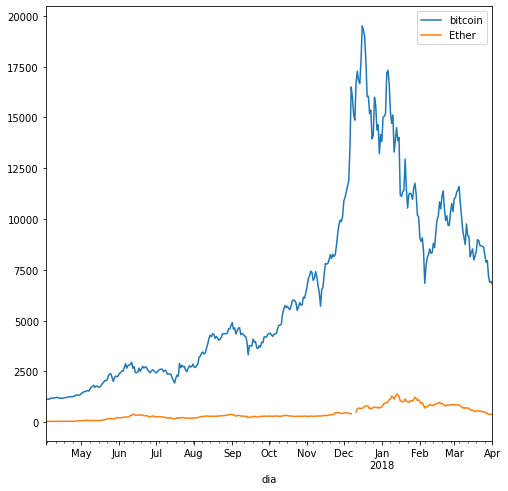

In [ ]:
preco2.plot(figsize=(8,8))

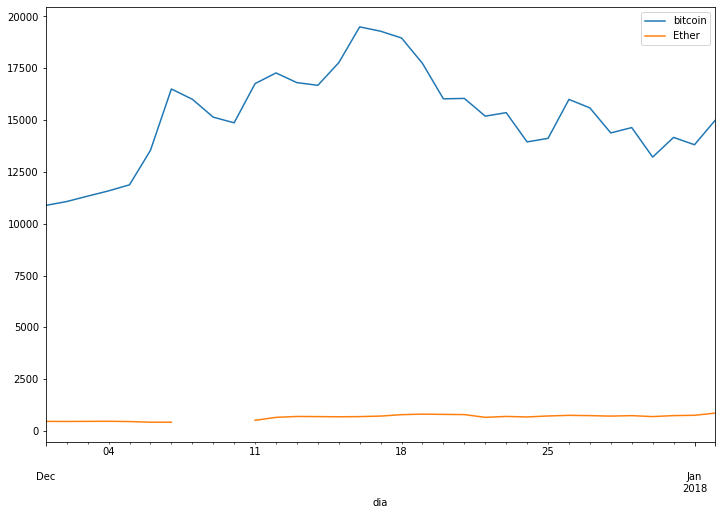

In [ ]:
#zoom parece que falta dados
preco2.loc['2017-12-01':'2018-01-02'].plot(figsize=(12,8))